#Description: 
This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import tweepy
from matplotlib import pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use("fivethirtyeight")

In [3]:
# Upload the data to Colab (only first time)
# from google.colab import files
# uploaded = files.upload()

In [4]:
# Twitter API credentials
# log = pd.read_csv("Login.csv")
# consumerKey = log["key"][0]
# consumerSecret = log["key"][1]
# accessToken = log["key"][2]
# accessTokenSecret = log["key"][3]

In [5]:
# Twitter API credentials
consumerKey = "1pKl94oeHXbXAvoHz9nT6LYED"
consumerSecret = "bsKrseCjT8VekAG2ToBcvOuDDgJ2SFL1xDYgID5pdtro1XWBqD"
accessToken = "1359874825527910401-dL38ZBIaZUUkpAGjfs6H8XMwdbxViq"
accessTokenSecret = "SKPI6ASdJH8Q9SZOYvbwQA3kruAuxAZultVyOABX4ASWb"

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [7]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
for tweet in posts[:5]:
  print(tweet.full_text + '\n')

Show the 5 recent tweets: 

I’m thrilled to join @Trevornoah, @AlokSharma_RDG, @iamrashidajones, @andersoncooper, @DonCheadle, @SavannahGuthrie, @kwelkernbc, @daxshepard and Monica Padman, Sal Khan, and Ariel Bissett to discuss how the world can work to avoid a climate disaster: https://t.co/blXhv7fa5l https://t.co/4k8xKEL26f

RT @melindagates: In 2020, global health went local. 

COVID-19 has shown us that what happens in one part of the world matters to the rest…

RT @codeorg: Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

RT @rajpanjabi: After being sworn in this morning, I'm honored to share that I've been appointed by @POTUS as the President’s Malaria Coord…

When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad): https://t.co/53Rf

In [8]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame(data=[tweet.full_text for tweet in posts], columns=["Tweets"])

# Show the frist first 5 rows of data
df.head()

,Tweets
0,"I’m thrilled to join @Trevornoah, @AlokSharma_..."
1,"RT @melindagates: In 2020, global health went ..."
2,RT @codeorg: Only 3% of Black students learn c...
3,RT @rajpanjabi: After being sworn in this morn...
4,"When it comes to preventing pandemics, scienti..."


In [9]:
# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Remove # synmbol
  text = re.sub(r'RT[\s]+', '', text) # Remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove links
  return text

# Clean the text
df["Tweets"] = df["Tweets"].apply(cleanTxt)

# Show the cleaned text
df.head()

,Tweets
0,"I’m thrilled to join , _RDG, , , , , , and Mo..."
1,": In 2020, global health went local. \n\nCOVID..."
2,: Only 3% of Black students learn computer sci...
3,": After being sworn in this morning, I'm honor..."
4,"When it comes to preventing pandemics, scienti..."


In [10]:
# Create a funciton to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a funciton to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

# Show dataframe with new columns
df.head()

,Tweets,Subjectivity,Polarity
0,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000
1,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000
2,: Only 3% of Black students learn computer sci...,0.657778,-0.002222
3,": After being sworn in this morning, I'm honor...",0.000000,0.000000
4,"When it comes to preventing pandemics, scienti...",0.321970,0.096591


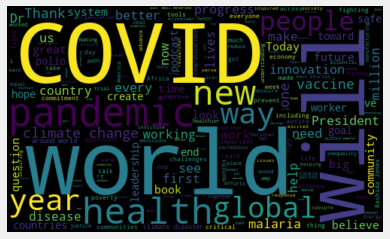

In [11]:
# Plot the word cloud
allWords = ' '.join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)

# Show dataframe with new column
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"I’m thrilled to join , _RDG, , , , , , and Mo...",0.700000,0.600000,Positive
1,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000,Neutral
2,: Only 3% of Black students learn computer sci...,0.657778,-0.002222,Negative
3,": After being sworn in this morning, I'm honor...",0.000000,0.000000,Neutral
4,"When it comes to preventing pandemics, scienti...",0.321970,0.096591,Positive


In [13]:
# Print all positive tweets
sortedDF = df.sort_values(by="Polarity", ascending=False)
for i in range(sortedDF.shape[0]):
  if (sortedDF["Analysis"].iloc[i] == "Positive"):
    print(str(i+1)+') '+sortedDF["Tweets"].iloc[i])

1) Happy 90th birthday, Warren! 
2) It’s great to see President Biden elevate science leadership to a cabinet-level position. Congratulations _lander. 
3) It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic  
4) Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. 
5) The season finale of our podcast features two incredible people who are using their positions as artists to change the world for the better. 
6) : The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…
7) I’m thrilled to join , _RDG, , , , , ,  and Monica Padman, Sal Khan, and Ariel Bissett to discuss how the world can work to avoid a climate disaster:  
8) This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these tim

In [14]:
# Print negative tweets
sortedDF = df.sort_values(by="Polarity")
for i in range(sortedDF.shape[0]):
  if (sortedDF["Analysis"].iloc[i] == "Negative"):
    print(str(i+1)+') '+sortedDF["Tweets"].iloc[i])

1) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 
2) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon:  
3) The President’s commitment to reengage with the world gives me hope that the recovery will reach everyone, including communities of color in the U.S. and people in poor countries around the world.
4) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.
5) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050:  
6) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…
7) : Even with hi

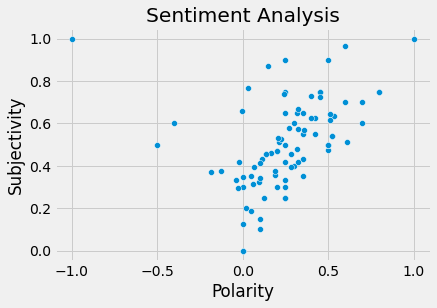

In [15]:
# Plot polarity vs subjectivity
sns.scatterplot(data=df, x="Polarity", y="Subjectivity")
plt.title("Sentiment Analysis")
plt.show()

In [16]:
# Get percentage of positive tweets
ptweets = df[df.Analysis=="Positive"]
ptweets = ptweets["Tweets"]

round((ptweets.shape[0]/df.shape[0])*100, 1)

78.0

In [17]:
# Get percentage of negative tweets
ntweets = df[df.Analysis=="Negative"]
ntweets = ntweets["Tweets"]

round((ntweets.shape[0]/df.shape[0])*100, 1)

9.0

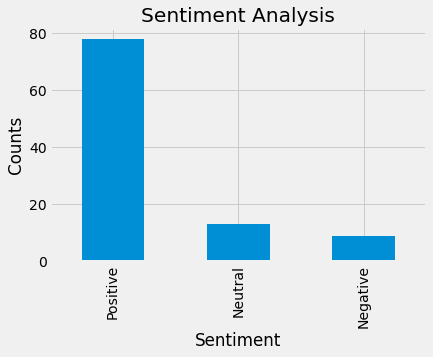

In [18]:
# Show value counts
df["Analysis"].value_counts()

# Plot counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind='bar')
plt.show()